### Vamos criar um modelo de regressão linear para prever o valor da nota final no enem com base nas horas semanais de estudo

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
notas = pd.read_csv('notas.csv', sep = ';')
notas = notas.drop('Nome', axis = 1)
notas.head() #Vamos dar uma olhadinha nos dados

,Horas estudadas,Nota
0,19,475
1,36,676
2,29,646
3,32,610
4,23,525


In [3]:
notas.corr() #Podemos ver que há uma correlação positiva entre a nota e as horas estudadas
#Ou seja, pessoas que estudam mais tentem a ter uma nota melhor no enem

,Horas estudadas,Nota
Horas estudadas,1.000000,0.672428
Nota,0.672428,1.000000


### Bom, que tal olharmos como esses dados se comportam num scatterplot?

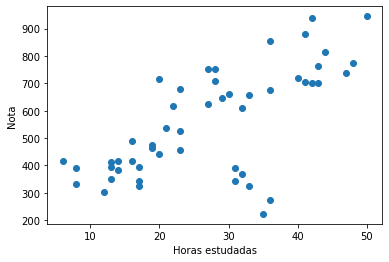

In [4]:
plt.scatter(notas['Horas estudadas'], notas['Nota'])
plt.xlabel('Horas estudadas')
plt.ylabel('Nota')
plt.show()

In [6]:
#Vamos começar a montar nosso modelo preditivo:
X = notas.iloc[:, :-1].values
y = notas.iloc[:, 1].values

In [7]:
#Agora vamos serparar em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
#A criação do modelo é bem simples:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [9]:
#Vamos testar o modelo:
y_pred = modelo.predict(X_test)
df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
df

,Real,Previsto
0,623,541.369919
1,659,610.237125
2,413,380.679772
3,390,587.281390
4,646,564.325654
5,681,495.458448
6,660,575.803522
7,417,300.334698
8,753,552.847787
9,525,495.458448


In [15]:
#Vamos verificar a acurácia do modelo com o RMSE (Root Mean Squared Error):
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 123.18102505914013
